In [ ]:
import numpy as np
import pandas as pd
import time 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import time

In [ ]:
df=pd.read_csv('/content/Train.csv')
df=df.iloc[:,df.columns!='INCIDENT_ID']
date=[]
for i in range(0,len(df.DATE)):
       x=df.iloc[i,0]
       date.append(int(x[7:9]))
df['DATE']=date
print(df)


       DATE  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  X_11  X_12  \
0         4    0   36   34    2    1    5    6    1    6     1   174   1.0   
1        17    1   37   37    0    0   11   17    1    6     1   236   1.0   
2        17    0    3    2    3    5    1    0    2    3     1   174   1.0   
3         9    0   33   32    2    1    7    1    1    6     1   249   1.0   
4         5    0   33   32    2    1    8    3    0    5     1   174   0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
23851     2    1   47   48    7    3   15   10    1    5     1   174   0.0   
23852    97    0   33   32    2    1    5    6    0    5     1   174   0.0   
23853    12    0   25   25    9    0    3    5    1    6     1   174   0.0   
23854     4    0   39   39    6    5    2    7    1    6     1   127   0.0   
23855    94    7   36   34    2    1    9    8    0    5     1   249   1.0   

       X_13  X_14  X_15  MALICIOUS_OFFENSE  
0        92    29 

In [ ]:
df.isna().sum()

DATE                   0
X_1                    0
X_2                    0
X_3                    0
X_4                    0
X_5                    0
X_6                    0
X_7                    0
X_8                    0
X_9                    0
X_10                   0
X_11                   0
X_12                 182
X_13                   0
X_14                   0
X_15                   0
MALICIOUS_OFFENSE      0
dtype: int64

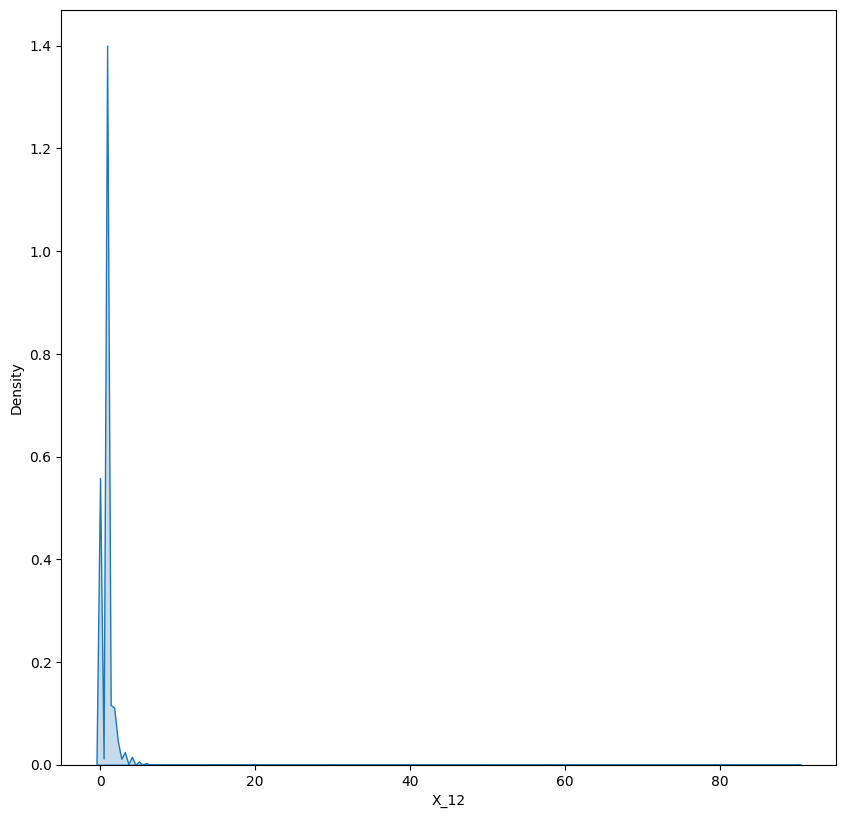

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
sns.kdeplot(x='X_12',data=df,shade=True)
plt.show()
#data is skewed, so replace NaN with median

In [ ]:
med=df['X_12'].median()


In [ ]:
df['X_12'] = df['X_12'].fillna(med)
df.isnull().sum()
print(med)

1.0


In [ ]:
acc=[]
times=[]
print(df)
x=df.iloc[:,df.columns!='MALICIOUS_OFFENSE']
y=df.iloc[:,df.columns=='MALICIOUS_OFFENSE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

       DATE  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  X_11  X_12  \
0         4    0   36   34    2    1    5    6    1    6     1   174   1.0   
1        17    1   37   37    0    0   11   17    1    6     1   236   1.0   
2        17    0    3    2    3    5    1    0    2    3     1   174   1.0   
3         9    0   33   32    2    1    7    1    1    6     1   249   1.0   
4         5    0   33   32    2    1    8    3    0    5     1   174   0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
23851     2    1   47   48    7    3   15   10    1    5     1   174   0.0   
23852    97    0   33   32    2    1    5    6    0    5     1   174   0.0   
23853    12    0   25   25    9    0    3    5    1    6     1   174   0.0   
23854     4    0   39   39    6    5    2    7    1    6     1   127   0.0   
23855    94    7   36   34    2    1    9    8    0    5     1   249   1.0   

       X_13  X_14  X_15  MALICIOUS_OFFENSE  
0        92    29 

**K-NEAREST NEIGHBOUR**


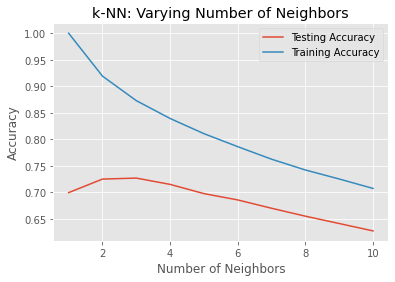

In [ ]:
no_neighbors=np.arange(1,11)

train_accuracy=[]

test_accuracy=[]

for i in range(1,11):

   knn = KNeighborsRegressor(n_neighbors=i)

   knn.fit(x_train,y_train)

   train_accuracy.append(knn.score(x_train,y_train))

   test_accuracy.append(knn.score(x_test,y_test))



plt.title('k-NN: Varying Number of Neighbors')

plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')

plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')

plt.legend()

plt.xlabel('Number of Neighbors')

plt.ylabel('Accuracy')

plt.show()

In [ ]:
start=time.time()
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x, y)
end=time.time()
knna=neigh.score(x_test, y_test)
acc.append(neigh.score(x_test, y_test))
times.append(end-start)
print(neigh.score(x_test, y_test))
print(end-start)


0.9067345225152015
0.0066111087799072266


**MULTI-LAYER PERCEPTRON**

In [ ]:
start=time.time()
clf = MLPClassifier(hidden_layer_sizes=(4,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

clf.fit(x_train,y_train)
end=time.time()
ypred=clf.predict(x_test)
timemlp=end-start
accuracy_score(y_test,ypred)
print(accuracy_score(y_test,ypred))
print(end-start)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.06395455
Iteration 2, loss = 0.50176387
Iteration 3, loss = 0.48233696
Iteration 4, loss = 0.47303384
Iteration 5, loss = 0.46239195
Iteration 6, loss = 0.43923553
Iteration 7, loss = 0.38042878
Iteration 8, loss = 0.21768007
Iteration 9, loss = 0.09680372
Iteration 10, loss = 0.06371454
Iteration 11, loss = 0.04654833
Iteration 12, loss = 0.03782982
Iteration 13, loss = 0.03076999
Iteration 14, loss = 0.02789035
Iteration 15, loss = 0.02254806
Iteration 16, loss = 0.02164133
Iteration 17, loss = 0.01882278
Iteration 18, loss = 0.01772093
Iteration 19, loss = 0.01798312
Iteration 20, loss = 0.01442514
Iteration 21, loss = 0.01251531
Iteration 22, loss = 0.01138221
Iteration 23, loss = 0.01126213
Iteration 24, loss = 0.01066224
Iteration 25, loss = 0.01130849
Iteration 26, loss = 0.01159212
Iteration 27, loss = 0.00817247
Iteration 28, loss = 0.00905342
Iteration 29, loss = 0.01068347
Iteration 30, loss = 0.00979876
Iteration 31, loss = 0.00870112
Iteration 32, los

**SUPPORT VECTOR MACHINE**

In [ ]:
start=time.time()
clf=svm.SVC()
clf.fit(x_train,y_train)
end=time.time()
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)
acc.append(accuracy_score(y_test,ypred))
times.append(end-start)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
start=time.time()
clf=svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
end=time.time()
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)
acc.append(accuracy_score(y_test,ypred))
times.append(end-start)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
start=time.time()
clf=svm.SVC(kernel='poly')
clf.fit(x_train,y_train)
end=time.time()
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)
print(accuracy_score(y_test,ypred))
print(end-start)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9811373480508593
1.5253241062164307


In [ ]:
clf=svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9523543384099483

In [ ]:
clf=svm.SVC(kernel='sigmoid')
clf.fit(x_train,y_train)
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9151879279027525

**DECISION TREE**

In [ ]:
start=time.time()
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
end=time.time()
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)
print(accuracy_score(y_test,ypred))
print(end-start)

1.0
0.020611286163330078


In [ ]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_train,y_train)
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)

0.9858879418750873

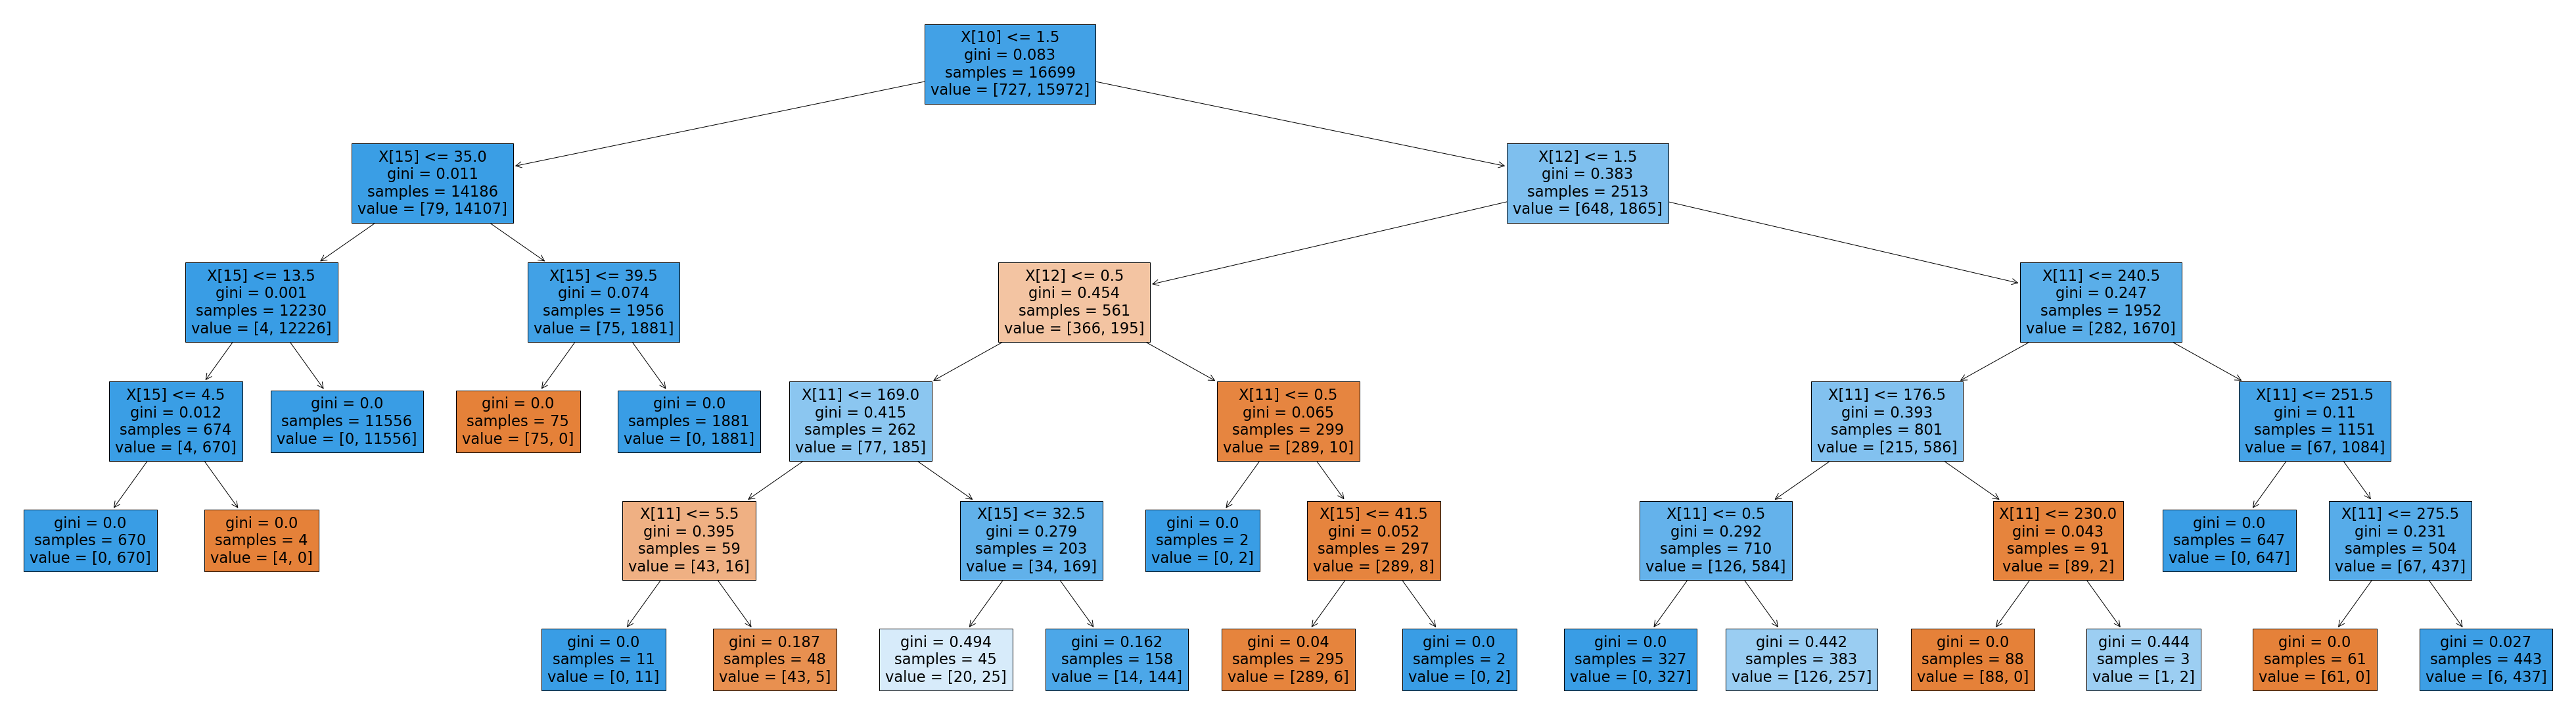

In [ ]:
from sklearn import tree
plt.figure(figsize=(70,20))
tree.plot_tree(clf, filled=True)
plt.show()

In [ ]:
start=time.time()
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train,y_train)
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)

0.998323319826743

**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from numpy import dot
from numpy.linalg import norm
start=time.time()
clf = GaussianNB()
clf.fit(x_train, y_train)
end=time.time()
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)
print(accuracy_score(y_test,ypred))
print(end-start)


0.9951096828280006
0.01730489730834961


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X1=[]
X2=[]
X3=[]
X4=[]
X5=[]
X6=[]
X7=[]
X8=[]
X9=[]
X10=[]
X11=[]
X12=[]
X13=[]
X14=[]
X15=[]
merge=[]
for i in df['X_1']:
  X1.append(i)
for i in df['X_2']:
  X2.append(i)
for i in df['X_3']:
  X3.append(i)
for i in df['X_4']:
  X4.append(i)
for i in df['X_5']:
  X5.append(i)
for i in df['X_6']:
  X6.append(i)
for i in df['X_7']:
  X7.append(i)
for i in df['X_8']:
  X8.append(i)
for i in df['X_9']:
  X9.append(i)
for i in df['X_10']:
  X10.append(i)
for i in df['X_11']:
  X11.append(i)
for i in df['X_12']:
  X12.append(i)
for i in df['X_13']:
  X13.append(i)
for i in df['X_14']:
  X14.append(i)
for i in df['X_15']:
  X15.append(i)
merge.append(X1)
merge.append(X2)
merge.append(X3)
merge.append(X4)
merge.append(X5)
merge.append(X6)
merge.append(X7)
merge.append(X8)
merge.append(X9)
merge.append(X10)
merge.append(X11)
merge.append(X12)
merge.append(X13)
merge.append(X14)
merge.append(X15)

for i in range(0,15):
  for j in range(i+1,15):
    print(dot(merge[i],merge[j]) / (norm(merge[i])*norm(merge[j])))

0.2822725796849847
0.2826188416473524
0.2635004089133716
0.22854107793456846
0.4860667131479842
0.49801649682897897
0.12839213677597267
0.31153287677766744
0.2394887599289145
0.2893231795933296
0.17940074885181376
0.3356241781849333
0.267476608956884
0.3061725994374205
0.9991735302210474
0.6706918464468306
0.5512309473399496
0.726039800570717
0.6856961809631742
0.4571918321514523
0.8185725105754833
0.6276307989032007
0.7851699670773145
0.5198965195178804
0.8180148325845616
0.7359421465354891
0.828111734528729
0.6794439420276748
0.5519629278366667
0.7276747233937576
0.6904267328005581
0.4595265754356363
0.818437959098648
0.628534134713126
0.78508830670356
0.5211435054309118
0.8176078642806112
0.7356329526582662
0.8273826638651546
0.7990165228763881
0.6759707043601785
0.6776356152122888
0.4935307276551914
0.7925402916083899
0.626908012179973
0.7424924249365507
0.554483365127332
0.7745454512093983
0.6988805257189024
0.7943667856989219
0.6088522024836401
0.6150628983692262
0.45877185099402


**XG-BOOST**



In [ ]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
start=time.time()
xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(x_train, y_train)
end=time.time()
preds = xgb_cl.predict(x_test)

accuracy_score(y_test, preds)
print(accuracy_score(y_test,ypred))
print(end-start)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9951096828280006
0.6984996795654297


**RANDOM FOREST**

In [ ]:
df = pd.read_csv('/content/Train.csv')
df.drop(df.iloc[:, 0:2], inplace=True, axis=1)
df

In [ ]:
df.dropna(inplace=True)

In [ ]:
x = df.iloc[:, 0:15 ].values 
y = df["MALICIOUS_OFFENSE"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
clf = RandomForestClassifier()
clf.fit(list(x_train),y_train)

y_pred =clf.predict(list(x_test))
print(y_pred)

In [ ]:
print("The accuracy is: ",clf.score(list(x_test),y_test))

In [ ]:
plt.hist(df['MALICIOUS_OFFENSE'],color='gold')
plt.show() 

In [ ]:
df.plot(x='MALICIOUS_OFFENSE',kind='bar')

In [ ]:
predictions = clf.predict(x_test)
predictions

In [ ]:
y_test

In [ ]:
start=time.time()
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
end=time.time()
y_pred =clf.predict(x_test)
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,ypred))
print(end-start)

<ipython-input-71-d46395c8e461>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)


0.9951096828280006
0.9045920372009277


In [ ]:
clf.predict_proba(x_test)

In [ ]:
clf.classes_

In [ ]:
clf.feature_importances_

In [ ]:
importances = clf.feature_importances_
x = pd.DataFrame(x)
column = x.columns
i = 0
while i < len(column):
  print(f"The importance of feature '{column[i]}' is: {round(importances[i]*100, 2)}%. ")
  i+=1

Predicting for a Test.csv dataset using Random Forest

In [ ]:
newdf=pd.read_csv(r'/content/Test.csv')
newdf=pd.DataFrame(newdf)
newdf.dropna(inplace=True)

In [ ]:
res=[]
value=[]
for i in range(0,10):
  new_possum=newdf.iloc[i,2:17]
                  
  new_possum=list(new_possum)
  
  res.append(new_possum)
  
  print("OUTPUT OF RANDOM FOREST IS:",clf.predict(res))
  y=clf.predict(res)

actualres=df.iloc[0:10,17]
print(y)


**LINEAR REGRESSION**

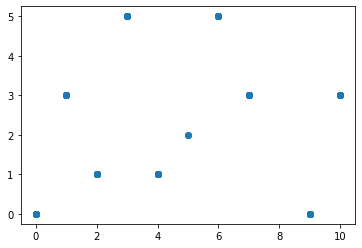

In [ ]:
X = df.iloc[:,4]
Y = df.iloc[:,5]
plt.scatter(X, Y)
plt.show()

In [ ]:
X = X.to_numpy()
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
X = X.reshape(-1,1)
print(X)
print(X)

[[2]
 [0]
 [3]
 ...
 [9]
 [6]
 [2]]
[[2]
 [0]
 [3]
 ...
 [9]
 [6]
 [2]]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
print("Mean squared error: %.2f" % mean_squared_error(x, y))

In [ ]:
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
y_pred = model.predict(x)
print(y_pred)

In [ ]:
X = df.iloc[:,3]
Y = df.iloc[:,16]
print(y)
X = x.to_numpy()
print(type(X))
X = X.reshape(-1,1)

       MALICIOUS_OFFENSE
0                      0
1                      1
2                      1
3                      1
4                      1
...                  ...
23851                  1
23852                  1
23853                  1
23854                  1
23855                  1

[23856 rows x 1 columns]
<class 'numpy.ndarray'>


In [ ]:
start=time.time()
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
end=time.time()
r_sq = model.score(x, y)
print(f"ACCURACY OF LINEAR REGRESSOR: {r_sq}")
print(end-start)

ACCURACY OF LINEAR REGRESSOR: 0.8772261211150485
0.0477299690246582


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x, y)
r_sq = model.score(x, y)
print(f"ACCURACY OF KNN REGRESSOR: {r_sq}")


ACCURACY OF KNN REGRESSOR: 0.8772261211150485
0.9951096828280006
0.05107235908508301


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"ACCURACY OF TREE REGRESSOR: {r_sq}")

ACCURACY OF TREE REGRESSOR: 0.10911063555199751


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
start=time.time()

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x, y)
clf.fit(x_train, y_train)
end=time.time()
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)
print(accuracy_score(y_test,ypred))
print(end-start)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

0.9993013832611429
1.6623687744140625


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**GAUSSIAN NAIVE BAYES**

In [ ]:
import math
data = pd.read_csv(r'/content/Train.csv')

In [ ]:
from sklearn.naive_bayes import GaussianNB
import time

coldata = ['X_1','X_2','X_3','X_4','X_5']
start = time.time()
model= GaussianNB()
fitting = model.fit(data[coldata],data["MALICIOUS_OFFENSE"])
score = model.score(data[coldata],data["MALICIOUS_OFFENSE"])
end = time.time()

print("Accuracy :",score)
print("Time taken :",(end-start))

K-MEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

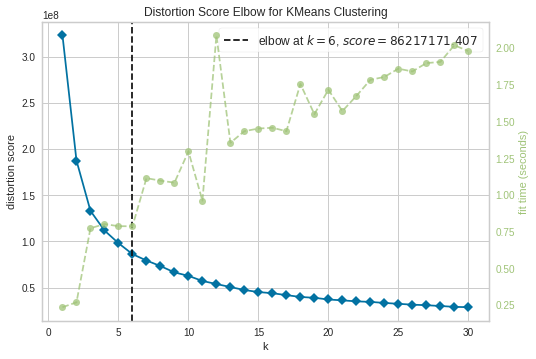

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,31))
visualizer.fit(df)  
visualizer.show()  

In [ ]:
kmeans = KMeans(5)
kmeans.fit(df)
identified_clusters = kmeans.fit_predict(df)
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = identified_clusters
print(kmeans.cluster_centers_)
print(identified_clusters)

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=data_with_clusters)
data_with_clusters.groupby(['Cluster']).count()
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=data_with_clusters['X_1']
yline=data_with_clusters['X_2']
zline=data_with_clusters['X_3']

ax.scatter3D(xline, zline,yline,c=data_with_clusters['Cluster'])
ax.view_init(60, 60)

In [ ]:
model = KMeans(
    n_clusters=5,
    n_init=10,
    random_state=42
    )
 
# train the model
model.fit(df)
 
# make a prediction on the data
p_labels = model.predict(df)
print(p_labels)

[0 4 0 ... 0 0 3]


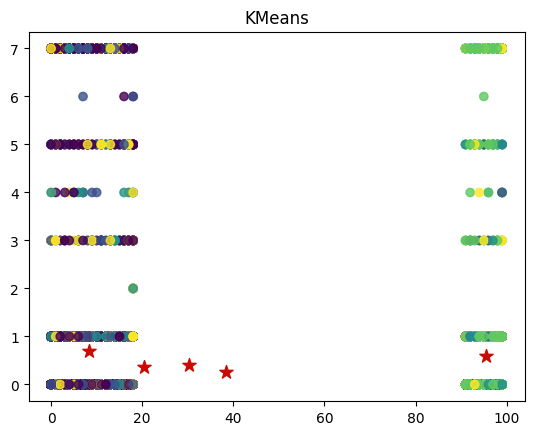

In [ ]:
plt.style.use('default')
 
X = df.iloc[:,0]
Y = df.iloc[:,1]
 
plt.scatter(X, Y, c=p_labels, alpha=0.8)
 
cluster_centers = model.cluster_centers_
cs_x = cluster_centers[:,0]
cs_y = cluster_centers[:,1]
plt.scatter(cs_x, cs_y, marker='*', s=100, c='r')
plt.title('KMeans')
plt.show()

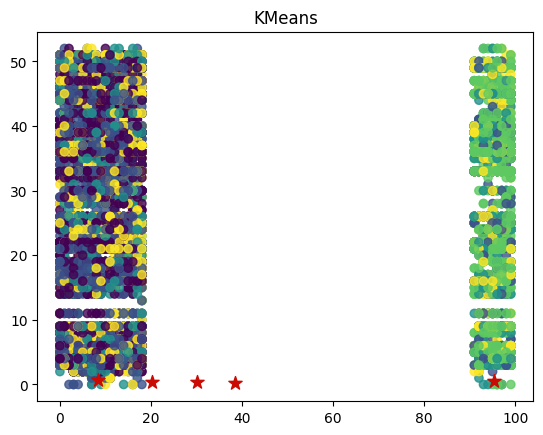

In [ ]:
plt.style.use('default')
 
X = df.iloc[:,0]
Y = df.iloc[:,2]
 
plt.scatter(X, Y, c=p_labels, alpha=0.8)
 
cluster_centers = model.cluster_centers_
cs_x2 = cluster_centers[:,0]
cs_y2 = cluster_centers[:,1]
 
plt.scatter(cs_x2, cs_y2, marker='*', s=100, c='r')
plt.title('KMeans')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(df,method='ward'))
plt.axhline(y=400000,color='r',linestyle='--')

In [ ]:
def explore(row: float):
  if row >= df['X_1'].mean():
    return 1
  else:
    return 0

appliance = df['X_1'].tolist()
classified_data = []
for i in appliance:
  classified_data.append(explore(i))

df['MALICIOUS_OFFENSE']=classified_data
print(df)

       DATE  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  X_11  X_12  \
0         4    0   36   34    2    1    5    6    1    6     1   174   1.0   
1        17    1   37   37    0    0   11   17    1    6     1   236   1.0   
2        17    0    3    2    3    5    1    0    2    3     1   174   1.0   
3         9    0   33   32    2    1    7    1    1    6     1   249   1.0   
4         5    0   33   32    2    1    8    3    0    5     1   174   0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
23851     2    1   47   48    7    3   15   10    1    5     1   174   0.0   
23852    97    0   33   32    2    1    5    6    0    5     1   174   0.0   
23853    12    0   25   25    9    0    3    5    1    6     1   174   0.0   
23854     4    0   39   39    6    5    2    7    1    6     1   127   0.0   
23855    94    7   36   34    2    1    9    8    0    5     1   249   1.0   

       X_13  X_14  X_15  MALICIOUS_OFFENSE  
0        92    29 

In [ ]:
x1=df.iloc[:,0:]
x2=df.iloc[:,16]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
sfs1 = SFS(knn, 
           k_features=7, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x1,x2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   21.9s finished

[2022-12-27 04:17:08] Features: 1/7 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   18.7s finished

[2022-12-27 04:17:27] Features: 2/7 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    8.9s finished

[2022-12-27 04:17:36] Features: 3/7 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0

**GRADIENT DESCENT**

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'/content/Train.csv')
df.dropna(inplace=True)

In [ ]:
X=df[['X_1' ]]
Y=df[['MALICIOUS_OFFENSE']]

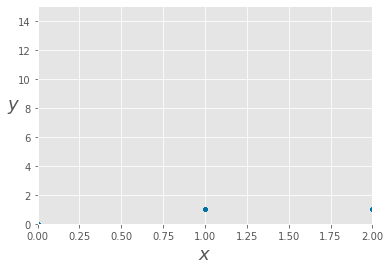

In [ ]:
%matplotlib inline
plt.style.use(['ggplot'])
plt.plot(X,Y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [ ]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
    

In [ ]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta, cost_history, theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.954,
Theta1:          0.002
Final cost/MSE:  12166395.445


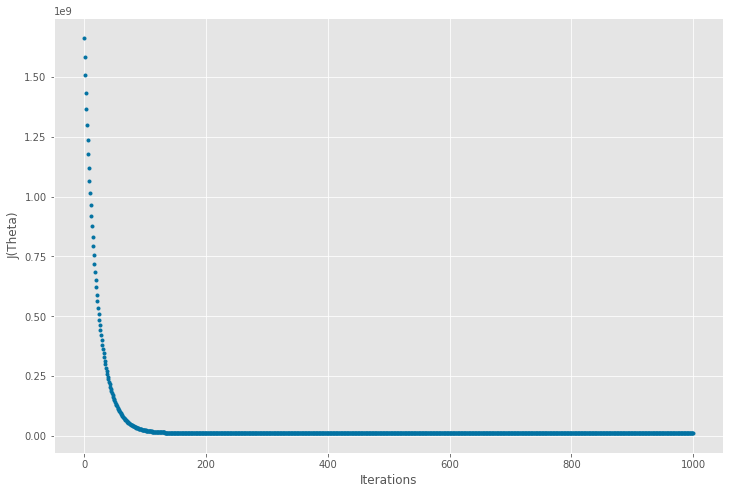

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

In [ ]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

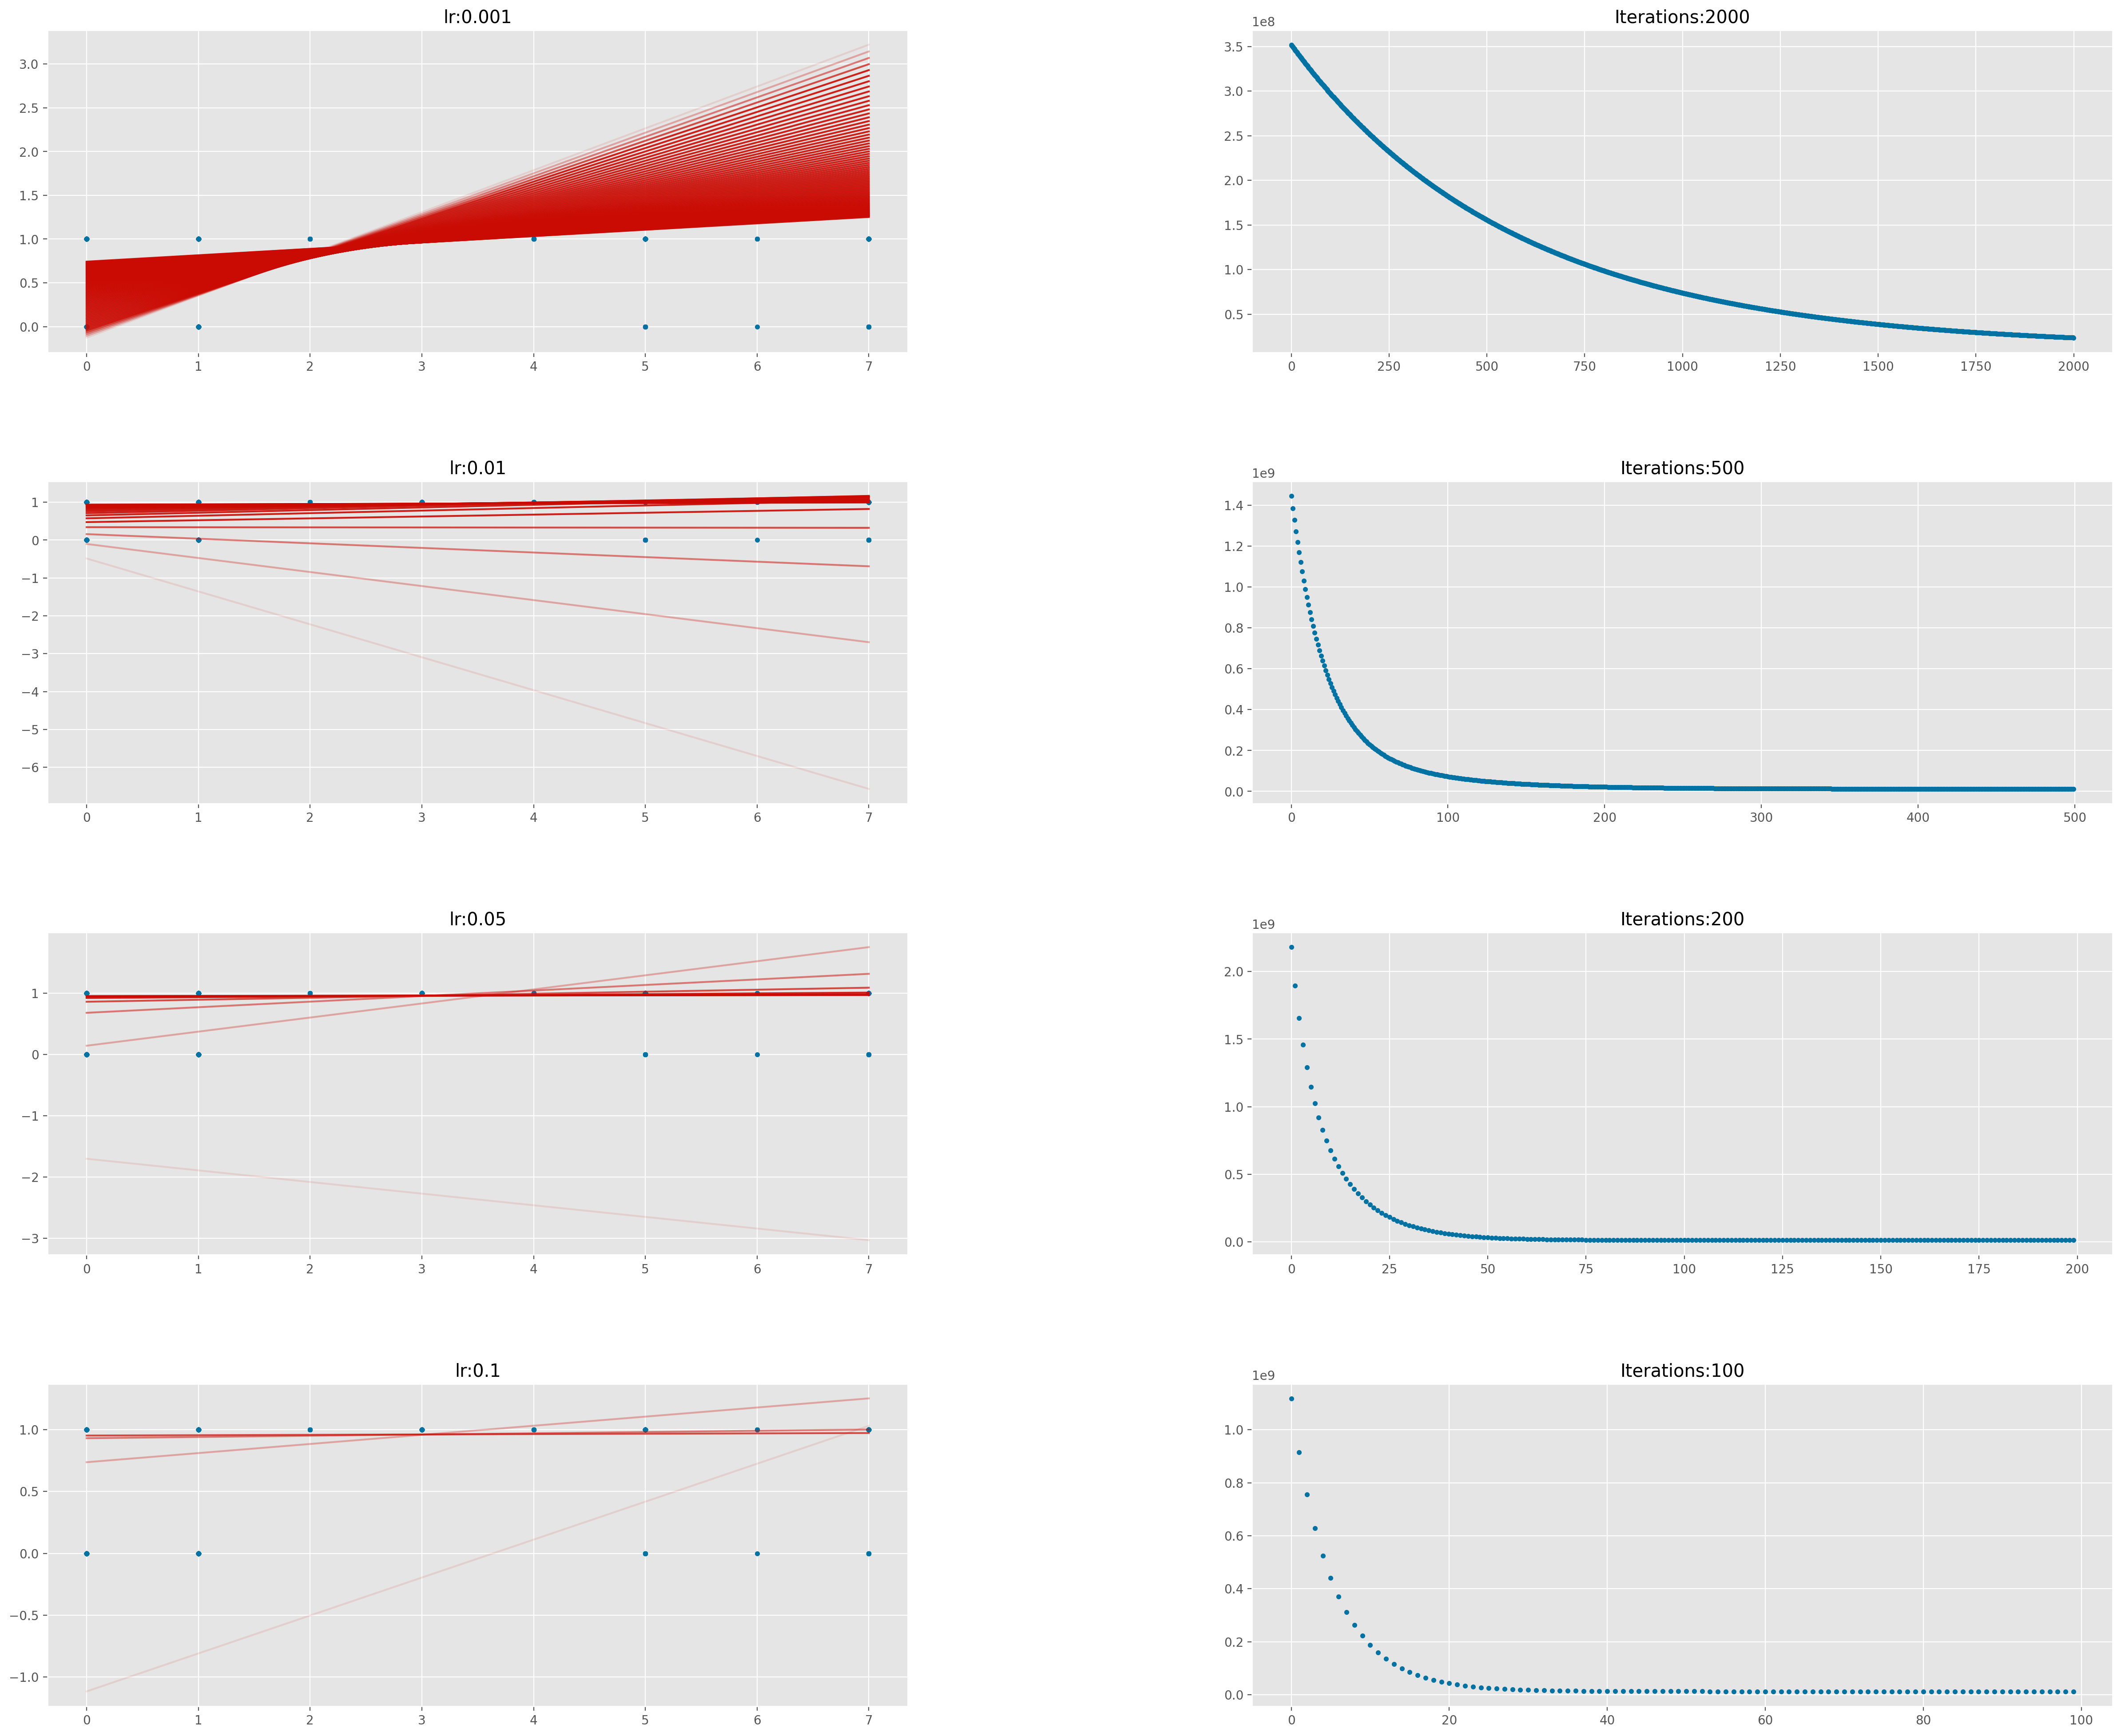

In [ ]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

**ACCURACY MEASURES**

In [ ]:
y_true = actualres
y_pred = y
print("PRECISION RECALL FSCORE FOR MACRO",precision_recall_fscore_support(y_true, y_pred, average='macro'))
print("PRECISION RECALL FSCORE FOR MICRO",precision_recall_fscore_support(y_true, y_pred, average='micro'))
print("PRECISION RECALL FSCORE FOR WEIGHTED",precision_recall_fscore_support(y_true, y_pred, average='weighted'))

In [ ]:
df.describe()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,36.241071,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974262,85.237383,72.674296,33.464747,0.202046
std,40.779469,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.163264,27.597226,43.297320,8.386834,0.401534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,0.000000
50%,13.000000,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,0.000000
75%,93.000000,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,0.000000
max,99.000000,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


**ROC CURVE**

In [ ]:
df=pd.read_csv('/content/Train.csv')
df.dropna(inplace=True)

In [ ]:
X=df.iloc[:100,2:17]
y=df.iloc[:100,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

log_regression = RandomForestClassifier()


log_regression.fit(X_train,y_train)

In [ ]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**PLOTS**

Graph of accuracy of all models

In [ ]:
print(acc)
print(len(acc))

[0.724576858621043, 0.9607377392762331, 0.9523543384099483, 0.9523543384099483, 0.9523543384099483, 0.9523543384099483, 0.9977644264356574, 0.9401984071538354, 0.9401984071538354, 0.9401984071538354, 0.9401984071538354, 0.9522146150621769]
12


In [ ]:
print(times)
print(len(times))

[0.005736112594604492, 2.9085941314697266, 2.628838300704956, 52.46074819564819, 3.311305522918701, 0.036266326904296875, 0.009059667587280273, 0.7539925575256348, 0.76017165184021, 0.03107452392578125, 1.6800975799560547]
11



**PCA**

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
features1=['DATE','X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']
print(features1)

['DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15']


In [ ]:
x = df.loc[:, features1].values
print(x)
y = df.loc[:,['MALICIOUS_OFFENSE']].values
print(y)

[[  4.   0.  36. ...  92.  29.  36.]
 [ 17.   1.  37. ... 103. 142.  34.]
 [ 17.   0.   3. ... 110.  93.  34.]
 ...
 [ 12.   0.  25. ...  10.  29.  18.]
 [  4.   0.  39. ... 112. 103.  43.]
 [ 94.   7.  36. ...  92.  29.  34.]]
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]


In [ ]:
x_scaled = StandardScaler().fit_transform(x)
print(x_scaled)
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

[[-0.79063676 -0.33602492  0.73548947 ...  0.24505213 -1.00872781
   0.30229601]
 [-0.47184221  0.35856051  0.80110665 ...  0.64365126  1.60118818
   0.06382199]
 [-0.47184221 -0.33602492 -1.42987743 ...  0.89730526  0.46945469
   0.06382199]
 ...
 [-0.59445549 -0.33602492  0.0137005  ... -2.72632324 -1.00872781
  -1.84397015]
 [-0.79063676 -0.33602492  0.932341   ...  0.96977783  0.70042071
   1.13695506]
 [ 1.41640243  4.52607309  0.73548947 ...  0.24505213 -1.00872781
   0.06382199]]
Shape before PCA:  (23856, 16)
Shape after PCA:  (23856, 2)


In [ ]:
pca.explained_variance_

array([2.42240324, 2.02063569])

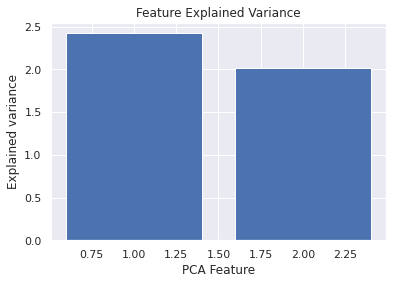

In [ ]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 
pca = PCA(n_components=2)
 
pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()


In [ ]:
pca = PCA(n_components=2)
 
# Fit and transform data
pca_features = pca.fit_transform(x_scaled)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   
target_names = {
    0:0,
    1:1, 
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,target
0,-1.084496,-0.325579,0
1,-2.781186,1.567730,1
2,2.591621,-1.091429,0
3,-0.716373,-0.787102,0
4,-1.288835,-0.839642,0


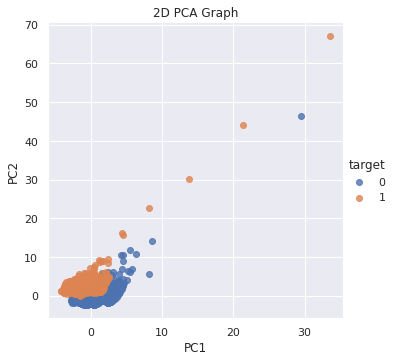

In [ ]:
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

**PLOTS**

In [ ]:
accuracy=[0.739,0.958,0.956,1,0.945,0.998,0.9951,0.955,0.0007,0.955]
times=[0.0066,4.713,3.713,3.445,0.058,0.698,0.904,0.025,0.0477,0.428]
classifier=['KNN','MLP','SVM','DECISION TREE','NAIVE BAYES','XG BOOST','RANDOM FOREST','GAUSSIAN NAIVE BAYES','LINEAR REGRESSION','LOGISTIC REGRESSION']

Graph of Accuracy

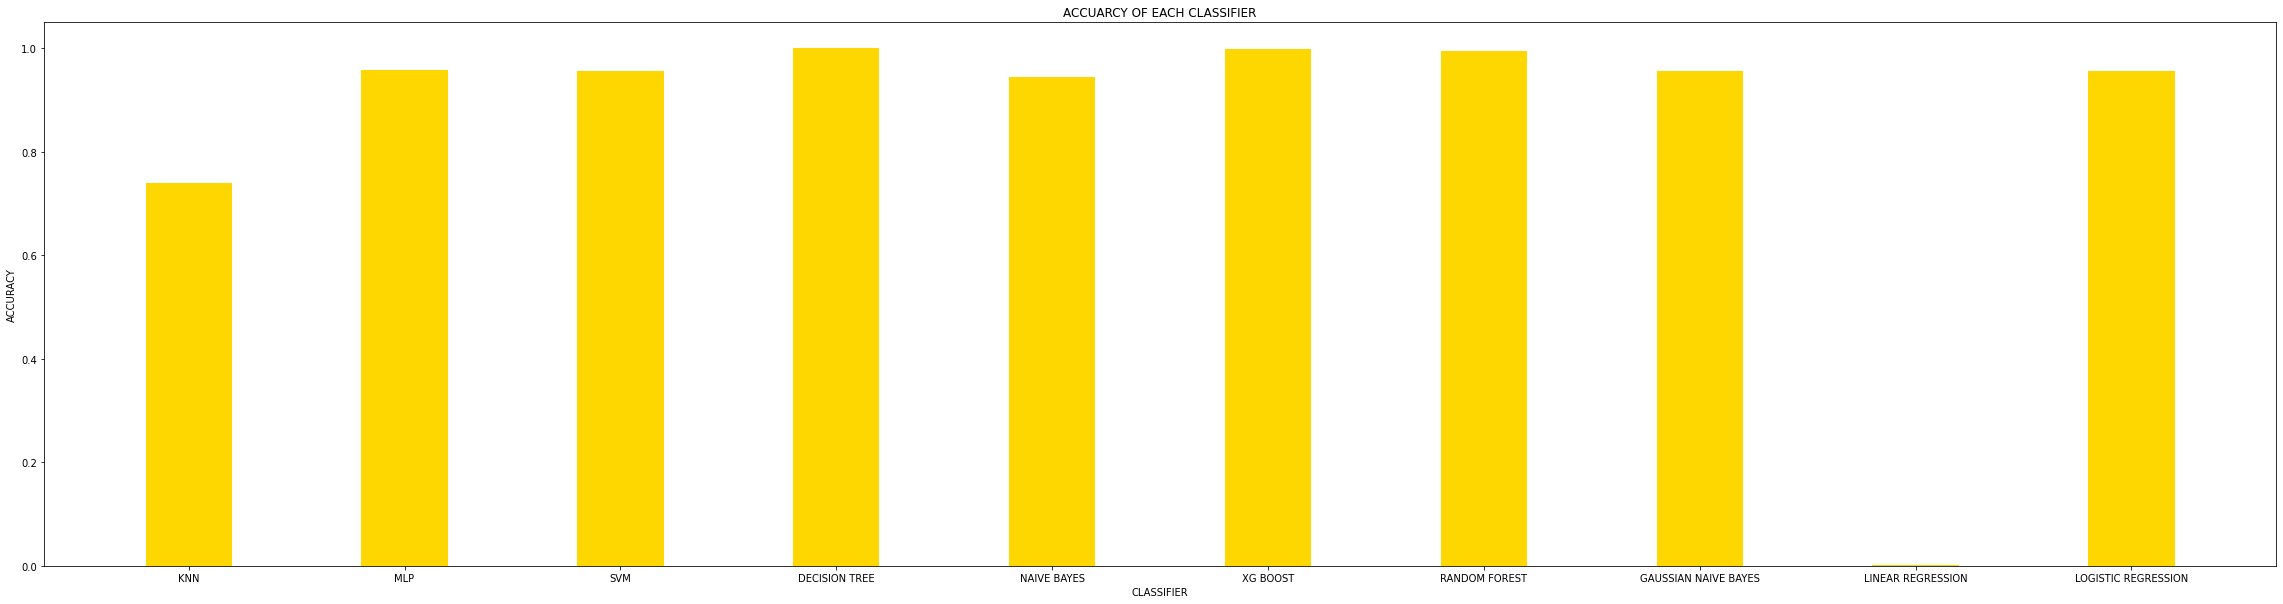

In [ ]:
fig = plt.figure(figsize = (40, 10))

plt.bar(classifier,accuracy, color ='GOLD',
        width = 0.4)
plt.xlabel("CLASSIFIER")
plt.ylabel("ACCURACY")
plt.title("ACCUARCY OF EACH CLASSIFIER")
plt.show()

Graph of Time Taken

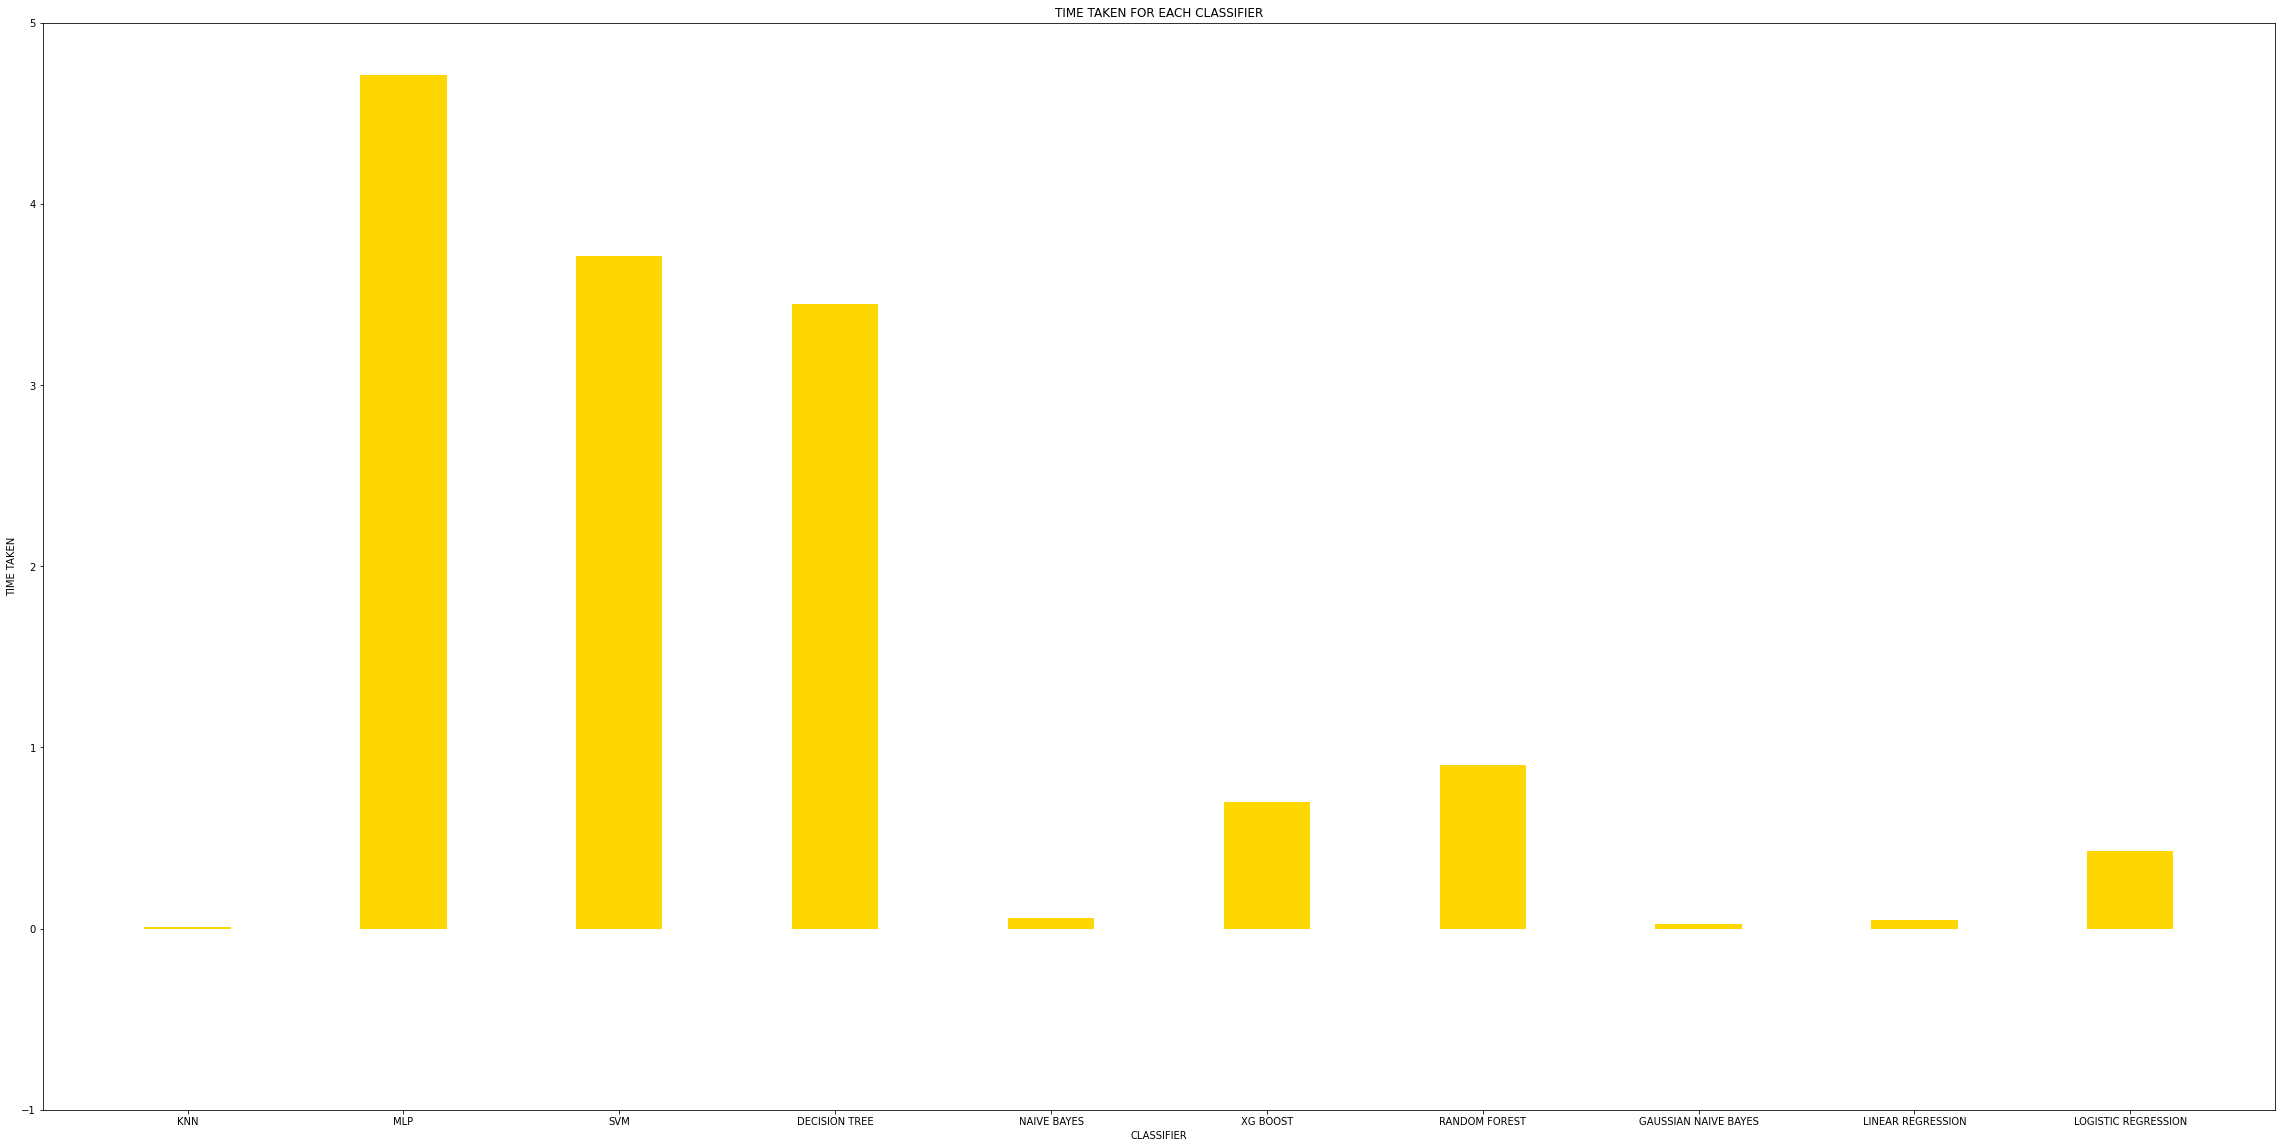

In [ ]:
fig = plt.figure(figsize = (40, 20))
plt.bar(classifier,times, color ='gold',
        width = 0.4)
plt.ylim(-1, 5)
plt.xlabel("CLASSIFIER")
plt.ylabel("TIME TAKEN")
plt.title("TIME TAKEN FOR EACH CLASSIFIER")
plt.show()



Graph of Accuracy vs Time

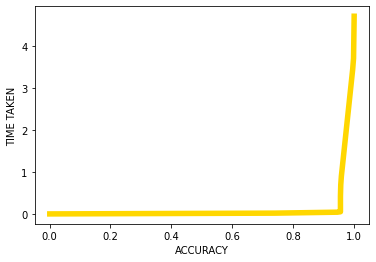

In [ ]:
accuracy.sort()
times.sort()
plt.xlabel("ACCURACY")
plt.ylabel("TIME TAKEN")
plt.plot(accuracy,times, c = 'gold',linewidth = '5.5')